Pisanie programu w języku Python wersji 3.6 oraz w nowszych, rozpoczynamy od zaimportowania potrzebnych bibliotek. 

In [4]:
# DEKLARACJA BIBLIOTEK
import numpy as np    #obliczenia numeryczne, operacje na macierzach

Biblioteka NumPy (z ang. Numeric Python) to podstawowy zestaw narzędzi inyżnierskich języka Python wspomagającym zaawasowane obliczenia numeryczne, w szczególności operacje na macierzach. W powyższej linijce kodu zaimporotwana została biblioteka "numpy" do naszego programu. Używanie nazwy "numpy" w kodzie, przy częstym jej wystepowaniu może być uciążliwe. Stąd zastosowany został alias "np". Dzięki niemu, możemy precyzować w kodzie, że dana funkcja lub metoda ma być zaimporotwana z biblioteki numpy. Sam sposób odwoływania sie przy pomocy aliasu będzie wyjaśniony później. Powyższą linijkę można dosłownie rozumieć jako "Python, zaimportuj bibliotekę NumPy oraz nadaj jej pseudonim np". Warto tutaj wspomnieć o własności języka Python jaką jest rozróżnianie wielkości liter (z ang. Case sensitivity). Próba zaimporotowania biblioteki NumPy z użyciem dużych i małych liter spowoduje powstanie błędu przedstawionego poniżej. https://docs.scipy.org/doc/numpy/reference/

In [5]:
import NumPy as np

ModuleNotFoundError: No module named 'NumPy'

In [6]:
from math import sin, cos, pi    #funkcje uzyte do wymuszen, wartosc liczby Pi

W przypadku, w którym wiemy dokładnie co chcemy zaimportować z danej biblioteki, możemy odwołać się do konkretnej funkcjonalności. Tak jest właśnie w przypadku kolejnej linii kodu. Z biblioteki math importujemy funkcje odpowiedzialne za wygenerowanie przebiegów sinusa i cosinusa. W tym przypadku nie nadajemy żadnego aliasu. https://docs.python.org/3/library/math.html.

Dobrym nawykiem początkującego programisty jest używanie komentarzy. W języku Python komentarz jest dodawany poprzez użycie symbolu "#". Kompilator pomija znaki znajdujące się po tym symbolu. W naszym przypadku został dodany komentarz informujacy do czego użyta zostanie dana biblioteka. Pomaga to na etapie "czyszczenia kodu", gdzie po wypróbowaniu kilku bibliotek, zdecydujemy się w końcu na którąś i będziemy chcieli inne (niewykorzystane) usunąć.

Do naszego programu potrzebne jeszcze będą poniższe biblioteki. W sposób skrócony ich funkcjonalność opisują komentarze. Na etapie wyboru bibliotek warto jest zapoznać się z ich funkcjonalnościami. Szczegółowe informacje można znaleźć wpisując w wyszukiwarkę nazwę biblioteki oraz słowo "reference". Przykładowe strony użytych bibliotek:
https://docs.python.org/3/library/math.html
https://docs.scipy.org/doc/numpy/reference/
https://matplotlib.org


In [7]:
from scipy.linalg import eigh         #analiza harmoniczna 
from numpy.linalg import inv          #odwracanie macierzy   
from matplotlib import pyplot as plot #rysowanie wykresow

Zdefiniujemy teraz konstrukcję naszego programu używając komentarzy:

In [8]:
# Funkcje wlasne

# Zdefiniowanie parametrow

# Budowanie macierzy

# Numeryczne calkowanie rownan ruchu

# Wizualizacja wynikow

Właściwe programowanie rozpoczniemy od definiowania zmiennych. Funkcje zostaną dodane później. Definiowanie funkcji na początku programu pomaga odnaleźć je w przypadku chęci zrozumienia ich działania.

In [9]:
Mzred = 1.0
Jzred = 1.0
k = 1.0
b = 0.50
L1 = 1.0
L2 = 2.0 
y1 = 0.0
y2 = 0.1
y3 = 0.3
y4 = 0.4
dof = 2
v = 10.0 #predkosc pojazdu
t0 = 0   #poczatek symulacji
tk = 60.0 #koniec symulacji
dt = 0.001 #krok czasowy symulacji



Język Python sam rozpoznaje typ danych, jakiego chcemy użyć. W Internecie dostępnych jest wiele opracowań typów danych języka Python, stąd nie będą one omawiane w tym artykule. Warto jednak wspomnieć o sposobie na wymuszenie typu danych float w miejscu gdzie interpreter oraz kompilator zdecydowały by się na liczbę całkowitą. Wystarczy dodać po wartości ".0". Tak w języku Python jako separator dziesiętny używamy kropki '.'. Typ danych można sprawdzić wywołując polecenie:

In [10]:
type(Mzred)

float

Na podstawie obliczonych przez równań (dodać odnośnik do równań) zaimplementujemy teraz macierze w naszym programie. Przypomnijmy oznaczenia M - macierz mas i bezwładności, K - macierz sprężystości, B - macierz tłumienia, F - macierz wyrażeń wolnych I- macierz jednostkowa. Do implementacji macierzy posłużymy się biblioteką NumPy. Przypomnijmy, że nadalismy jej alias "np". Stąd macierz mas i bezwładności przyjmie postać:

In [11]:
M = np.array([[Mzred    ,   0],[0    , Jzred]])   #budowanie macierzy mas i bezwladnosci
print(M)

[[1. 0.]
 [0. 1.]]


Przyjrzymy się temu poleceniu. Początek instrukcji "np.array()" odwołuję się do funkcjonalności biblioteki NumPy i każde odnaleźć polecenie "array", które tworzy macierz na podstawie dostarczonych danych. Więcej o tej metodzie możesz przeczytać tutaj: https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html. Następnie, wewnątrz okrągłego nawiasu mamy dwa nawiasy kwadratowe. Patrząc szerzej zauważysz, że są one użyte w następującym ułożeniu: "[  []  , []  ]". Wewnętrzne nawiasy określają zakres jednego wiersza i przedzielone są przecinkiem. Zewnętrzny nawias określa cała macierz. Wewnętrzne nawiasy zawierają poszeczególne elementy macierzy. Jeśli na tym etapie pojawił Ci się błąd, sprawdź czy zgadza Ci się liczba nawiasów. Większość edytorów tekstu ze sprawdzaniem składni języka Python podpowiada, który nawias nie ma pary.

W identyczny sposób zbudowane zostają pozostałe macierze:

In [12]:
K = np.array( [    [4 * k, 0],[0, 2*k * (L1**2) + 2*k * (L2**2)  ]   ] )
print(K)

[[ 4.  0.]
 [ 0. 10.]]


In [13]:
B = np.array( [    [4 * b, 0],[0, 2*b * (L1**2) + 2*b * (L2**2)  ]   ] )
print(B)

[[2. 0.]
 [0. 5.]]


In [14]:
D = np.array( [[k*(y1 + y2 + y3 + y4)],[k *(-y1*L1  - y2*L2   +   y3 * L2   +   y4*L1)]])
print(D)

[[0.8]
 [0.8]]


In [15]:
I = np.identity(dof)
print(I)

[[1. 0.]
 [0. 1.]]


In [16]:
T = np.arange(t0,tk+dt,dt)    #Obliczanie wektora czasu symulacji
print(T)

[0.0000e+00 1.0000e-03 2.0000e-03 ... 5.9998e+01 5.9999e+01 6.0000e+01]


O ile znak dodawania + oraz mnożenia * jest taki sam jak w znacznej większości języków programowania, to szczególną uwage należy zwrócić na znak podnoszenia do potęgi. W języku Python wykorzystywany jest ** zamiast powszechnie używanego "^". 

Przejdźmy teraz do zdefiniowania pierwszej funkcji w sekcji #Funkcje wlasne. Będzie to funkcja opisujaca profil drogi. Na podstawie parametrów zadanych w czasie wywołania będzie zwracała funkcję opisującą wymuszenia. Definicja funkcji jest niebywale prosta. Należy jednak pamiętać o kilku zasadach. Definicję rozpoczynamy od słowa 'def'. Dalej po spacji podajemy nazwę funkcji, przy pomocy której będziemy ją wywoływać. Musi spełniać ona ogólne wymogi dotyczące nazw zmiennych oraz funkcji w języku Python. W nawiasie znajdować się będą parametry, które zostaną podane w czasie wywołania funkcji. W poniższym przykładzie jest to zmienna a. Koniecznie należy pamiętać o zakończeniu nagłówka funkcji, którym jest znak ":". Instrukcje wewnątrz pętli muszą rozpoczynać się od wcięcia na jeden tabulator (4 spacje). Jest to podstawa składni języka Python, która odróżnia go od innych języków. Wcięcia w tekście służą do porządkowania kodu i są wymagane do poprawnego działania programu. Definicja funkcji, która zwraca jakąś wielkość zakończona jest poleceniem "return".

In [17]:
def profil_drogi(a1, a2, T1, T2, v, T):
    #Zwraca funkcje poliharmoniczna na podstawie wektora czasu
    #Input:    a1,T1 - amplituda i okres pierwszej skladowej wymuszenia
    #          a2,T2 - amplituda i okres drugiej skladowej wymuszenia
    #          v     - predkosc pojazdu
    #          ds, dt- krok dla czasu i dla drogi
    #          T     - wektor czasu symulacji
    result = np.zeros(( np.size(T)))     #tworzenie macierzy wynikowej
    #przypisywanie profilu drogi z uwzględnieniem plaskiego poczatku
    
    
    for i in range(np.size(T)-1):
        if (T[i] < T1):
            result[i] = 0
        else:
            result[i] = a1* sin(2* pi/T1*T[i]) + a2* sin (2*pi/T2*T[i])
    return result


In [18]:
A = profil_drogi(0.2, 0.05, 3 , 1, v, T)
#plot(T,A)

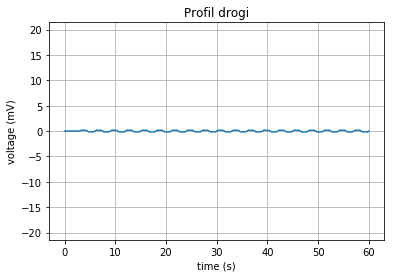

In [19]:
fig, ax = plot.subplots()
ax.plot(T, A)
ax.axis('equal')
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='Profil drogi')
ax.grid()

#fig.savefig("test.png")
plot.show()